# Pymaceuticals Inc.
---

### Analysis

 The first summary table suggests that while the effeectiveness of Capoumulin is comparable to Ramicane, it is significantly more effective than the other drugs that were used in this study.
 
 Looking at the box and whisker, Capomulin and Ramicane have an IQR that is almost the same. However, Capomulin has a more even distribution of tumor volumes as seen in the whiskers of the plot.
 
 A correlation coefficient of 0.84 is close to the maximum value of 1, which suggests that there is a very strong positive relationship between mouse weight and average tumor volume. In other words, as mouse weight increases, the average tumor volume tends to increase as well, and vice versa. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_research_data = pd.merge(mouse_metadata, study_results, how='right')

# Display the data table for preview
combined_research_data = combined_research_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

combined_research_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
num_mice = combined_research_data['Mouse ID'].nunique()
num_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_research_data.loc[combined_research_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = combined_research_data.loc[combined_research_data["Mouse ID"] == "g989", :]
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_research_data[combined_research_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].nunique()
clean_mice

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# group the data by the drug regimen and calculate the summary statistics
summary_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# rename the columns for clarity
summary_df = summary_df.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 
                                        'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'})

# print the summary DataFrame
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Timepoints by Drug Regimen')

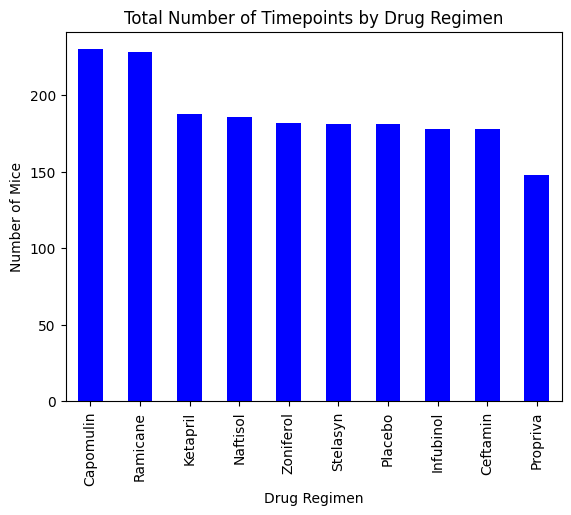

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Get timepoints by regimen
timepoint_data = clean_df["Drug Regimen"].value_counts()
pandas_bar = timepoint_data.plot.bar(color='b')  
# Set the xlabel, ylabel, and title
pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Number of Mice")
pandas_bar.set_title("Total Number of Timepoints by Drug Regimen")

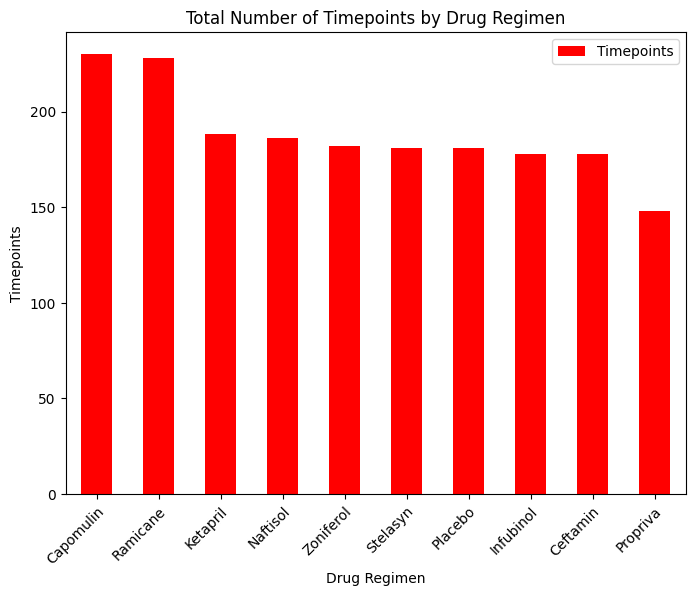

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Get timepoints by regimen
timepoint_data = clean_df["Drug Regimen"].value_counts()
# Create new dataframe for data to chart
timepoint_df = pd.DataFrame({"Timepoints": timepoint_data})

# Configure plot, figsize, title, and axis labels
figure1 = timepoint_df.plot(kind="bar", color=["red", "blue"], figsize=(8,6),
                                   title="Total Number of Timepoints by Drug Regimen",
                                   xlabel="Drug Regimen",
                                   ylabel="Timepoints")

# Configure x-tick rotation
xticklabels = timepoint_df.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()



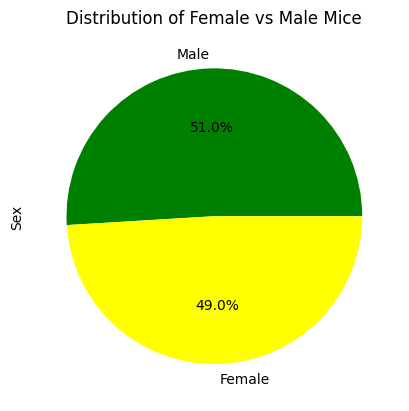

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Get gender data
gender_data = clean_df["Sex"].value_counts()
#set up the pie chart
colors=["green", "yellow"]
plt.title("Distribution of Female vs Male Mice")
gender_data.plot.pie(autopct='%1.1f%%', colors=colors)
plt.show()

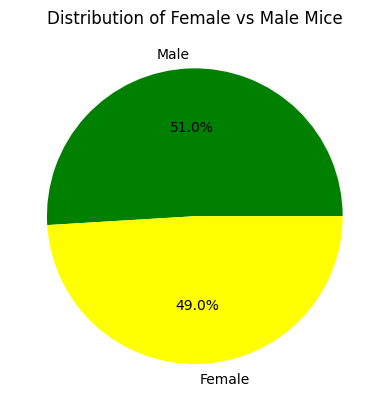

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Get gender data
gender_data = clean_df["Sex"].value_counts()
colors=["green", "yellow"]


#create a pie chart based on the above data
plt.pie(gender_data, labels=gender_data.index, colors=colors, autopct="%1.1f%%", shadow=False, startangle=0)
plt.title('Distribution of Female vs Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin

# Step 1: Create a list of the treatment regimens of interest
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Group the DataFrame by the mouse ID and treatment regimen
max_timepoint = clean_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].agg('max')
final_tumor_volume = clean_df.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].agg(lambda x: x.iloc[-1])

# Step 3: Aggregate the maximum timepoint and the final tumor volume for each group
merged_df = pd.merge(max_timepoint, final_tumor_volume, on=['Mouse ID', 'Drug Regimen'])
merged_df = merged_df.reset_index()

# Step 4: Filter the merged DataFrame to only include the treatment regimens of interest
final_tumor_volume = merged_df[merged_df['Drug Regimen'].isin(drug_list)]
final_tumor_volume.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
3,a275,Ceftamin,45,62.999356
6,a411,Ramicane,45,38.407618
7,a444,Ramicane,45,43.047543


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]
outliers=[]

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    rows = final_tumor_volume.loc[final_tumor_volume['Drug Regimen']==treatment]['Tumor Volume (mm3)']
   #make tumor values into a list so that we can add them to the tumor_vol_data
    tumor_volumes= rows.values.tolist()
    # Add the tumor volume data to the list
    tumor_vol_data.append(tumor_volumes)
    # add subset 
    subset=final_tumor_volume[final_tumor_volume['Drug Regimen']==treatment]
 
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = rows.quantile([.25,.5,.75])
    lowerq = subset['Tumor Volume (mm3)'].quantile(0.25)
    upperq = subset['Tumor Volume (mm3)'].quantile(0.75)
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_subset=subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
    outliers.append(outliers_subset)
    
    print("--------------------------------------------------------------------------------------------------------------")
    print(f"{treatment}'s potential outliers: ")
    print(outliers_subset)

--------------------------------------------------------------------------------------------------------------
Capomulin's potential outliers: 
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Tumor Volume (mm3)]
Index: []
--------------------------------------------------------------------------------------------------------------
Ramicane's potential outliers: 
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Tumor Volume (mm3)]
Index: []
--------------------------------------------------------------------------------------------------------------
Infubinol's potential outliers: 
   Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
31     c326    Infubinol          5           36.321346
--------------------------------------------------------------------------------------------------------------
Ceftamin's potential outliers: 
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Tumor Volume (mm3)]
Index: []


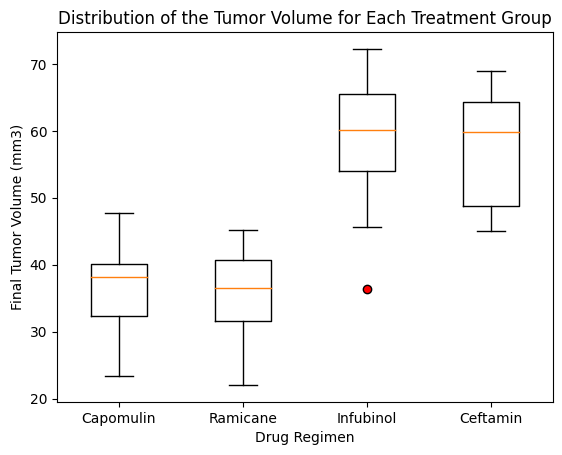

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of the Tumor Volume for Each Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops={'marker': 'o', 'markerfacecolor': 'red'})
plt.show()

## Line and Scatter Plots

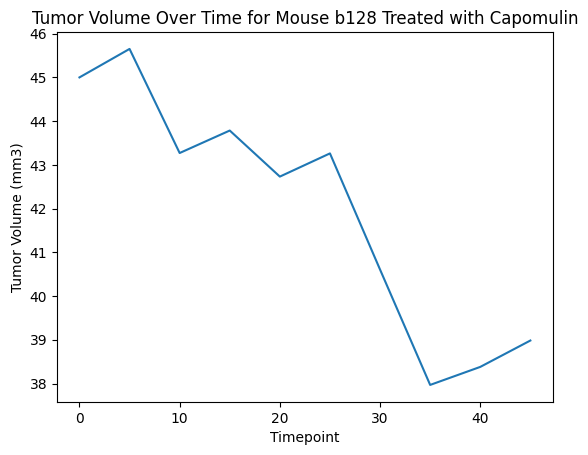

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# 1. Filter the DataFrame to only include data for the Capomulin drug regimen.
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# 2. Select a specific mouse to plot data for.
mouse_id = 'b128'
mouse_df = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

# 3. Use Matplotlib to create a line plot of the tumor volume vs. time point for the selected mouse.
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume Over Time for Mouse {mouse_id} Treated with Capomulin')
plt.show()

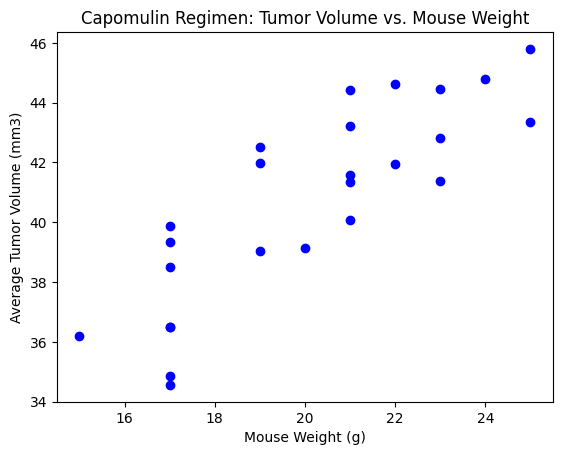

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Group the data by mouse ID and calculate the mean tumor volume for each mouse
grouped_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

weights = grouped_data['Weight (g)']
volumes = grouped_data['Tumor Volume (mm3)']

# Create the scatter plot
plt.scatter(weights, volumes, color='blue', marker='o')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Regimen: Tumor Volume vs. Mouse Weight')
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84.


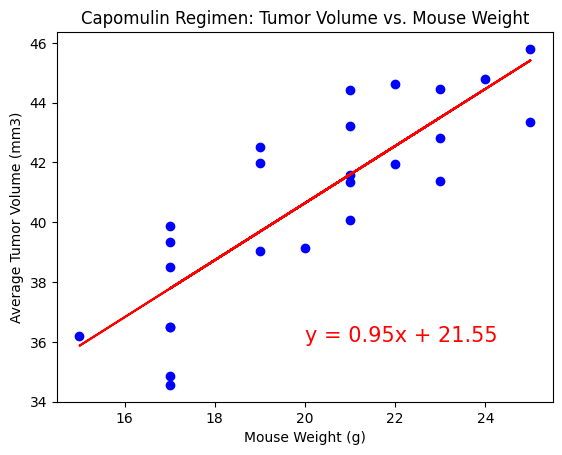

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(weights,volumes)[0],2)}.")

#linear regression model
# Add the linear regression equation and line to plot
weights = grouped_data['Weight (g)']
volumes = grouped_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, volumes)
regress_values = weights * slope + intercept

#add the line equation to the plot
line_eq = f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(weights, volumes, color='blue', marker='o')
plt.plot(weights,regress_values,"r-")

#have the line equation show on the plot
plt.annotate(line_eq, (20, 36), fontsize=15, color="red")

#add the labels and title to the plot
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Regimen: Tumor Volume vs. Mouse Weight')
plt.show()